### Project Title: Titanic - Machine Learning from Disaster
#### Done By: Johannes Malefetsane Makgetha

---
<a id="cont"></a>
## Table of Contents

<a href=#BC> Background Context</a>

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Data Collection and Description</a>

<a href=#three>3. Loading Data</a>

<a href=#four>4. Data Cleaning and Filtering</a>

<a href=#five>5. Data Preprocessing</a>

<a href=#six>6. Exploratory Data Analysis (EDA)</a>

<a href=#seven>7. Modeling</a>

<a href=#eight>8. Evaluation and Validation</a>

<a href=#tnin>9. Final Model</a>

<a href=#ten>10. Conclusion and Future Work</a>

<a href=#eleven>11. References</a>

---
<a id="BC"></a>
## **Background Context**
<a href=#cont>Back to Table of Contents</a>

---


---
<a href=#one></a>
## **Importing Packages**
<a href=#cont>Back to Table of Contents</a>

---

<div class="alert alert-block alert-info">
<b>Importing Packages</b> involves the inclusion of necessary libraries needed for data analysis and visualization. This step sets up the environment for executing data manipulation, statistical analysis, and generating plots.
</div>

In [2]:
# Importing pandas for data manipulation and analysis
import pandas as pd

# Importing seaborn for statistical data visualization
import seaborn as sns

# Importing matplotlib for plotting graphs and charts
import matplotlib.pyplot as plt


---
<a href=#three></a>
## **Loading Data**
<a href=#cont>Back to Table of Contents</a>


---

<div class="alert alert-block alert-info">
<b>Loading Data</b> is the process of importing the dataset into the analysis environment. This may involve reading data from various formats such as CSV, Excel, or SQL databases. Ensuring that the data is loaded correctly is crucial for subsequent analysis, as it lays the foundation for all future steps.
</div>

In [3]:
# Load the data
data = pd.read_csv("train.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Shape of the Data


In [4]:
data.shape

(891, 12)

Next, we check a summary of the dataFrame

In [5]:
# Display summary information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


---
<a href=#four></a>
## **Data Cleaning and Filtering**
<a href=#cont>Back to Table of Contents</a>


---

<div class="alert alert-block alert-info">
<b>Data Cleaning</b> is a critical phase where the dataset is prepared for analysis. This involves handling missing values, correcting inconsistencies, removing duplicates, and addressing any outliers. Clean data is essential for ensuring the validity and reliability of the analysis results.
</div>

In [6]:
data_cleaned = data.copy()

**Duplicates**



In [7]:
print("Number of Duplicates:", data_cleaned.duplicated().sum())

Number of Duplicates: 0


**Handling Missing Values**


In [8]:
# Check for missing values
print(data_cleaned.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Columns with Missing Values:
* Age: 177 missing values
* Cabin: 687 missing values
* Embarked: 2 missing values

NB!!! Handle missing value

In [9]:
data_cleaned['Age']= data_cleaned['Age'].fillna(data_cleaned['Age'].mean())
data_cleaned['Cabin'] = data_cleaned['Cabin'].fillna(data_cleaned['Cabin'].mode()[0])
data_cleaned['Embarked'] = data_cleaned['Embarked'].fillna(data_cleaned['Embarked'].mode()[0])


In [10]:
data_cleaned.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

**Summary:**
- Ensured all columns have consistent names.
- Handled all missing values.
- Converted features with incorrect formats to the correct format.


---
<a href=#five></a>
## **Data Preprocessing**
<a href=#cont>Back to Table of Contents</a>


---

<div class="alert alert-block alert-info">
<b>Data Preprocessing</b> encompasses the steps taken to prepare the data for analysis or modeling. This includes converting data types, encoding categorical variables. Effective preprocessing ensures that the data is in the right format for the analytical techniques to be applied.
</div>

In [11]:
data_enconded = data_cleaned.copy()
data_enconded.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S


In [12]:
data_enconded.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [13]:
data_enconded = data_enconded.drop(['Name','Ticket'],axis=1)

In [14]:
data_enconded['Sex'] = data_enconded['Sex'].map({'male':0,'female':1})
cat_columns = ['Cabin']
data_enconded = pd.get_dummies(data_enconded,columns=cat_columns,drop_first=True)


In [15]:
data_enconded['Embarked']  = data_enconded['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

In [16]:
numeric_cols = ['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
print(numeric_cols)


['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_enconded[numeric_cols] = scaler.fit_transform(data_enconded[numeric_cols])


In [18]:
data_enconded.dtypes.value_counts()

bool       146
float64      6
int64        3
Name: count, dtype: int64

In [19]:
data_enconded.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_A14,...,Cabin_E8,Cabin_F E69,Cabin_F G63,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T
0,-1.730108,0,0.827377,0,-0.592481,0.432793,-0.473674,-0.502445,2,False,...,False,False,False,False,False,False,False,False,False,False
1,-1.726220,1,-1.566107,1,0.638789,0.432793,-0.473674,0.786845,0,False,...,False,False,False,False,False,False,False,False,False,False
2,-1.722332,1,0.827377,1,-0.284663,-0.474545,-0.473674,-0.488854,2,False,...,False,False,False,False,False,False,False,False,False,False
3,-1.718444,1,-1.566107,1,0.407926,0.432793,-0.473674,0.420730,2,False,...,False,False,False,False,False,False,False,False,False,False
4,-1.714556,0,0.827377,0,0.407926,-0.474545,-0.473674,-0.486337,2,False,...,False,False,False,False,False,False,False,False,False,False


---
<a href=#five></a>
## **Exploratory Data Analysis (EDA)**
<a href=#cont>Back to Table of Contents</a>

---


<div class="alert alert-block alert-info"> <b>Exploratory Data Analysis (EDA)</b> is a crucial process in data analysis that involves summarizing and visualizing datasets to uncover patterns, trends, and anomalies. This process employs various techniques, including descriptive statistics, data visualization, and data cleaning. The primary objective of EDA is to gain a better understanding of the data's structure and characteristics, which helps inform subsequent analysis and model building. By identifying relationships and insights within the data, EDA plays a vital role in guiding decision-making and hypothesis formulation. </div>

In [20]:
data_cleaned.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S


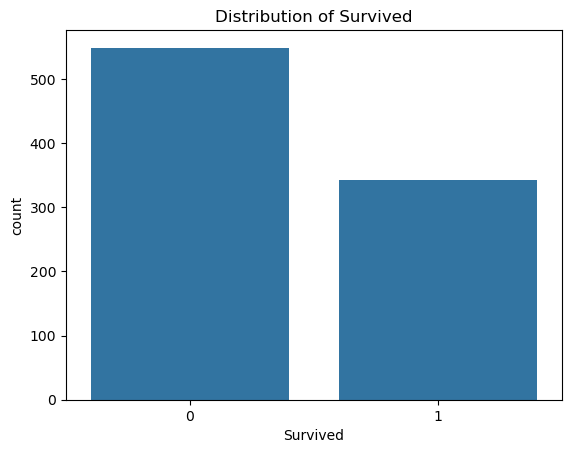

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=data_cleaned['Survived'])
plt.title("Distribution of Survived")
plt.show()


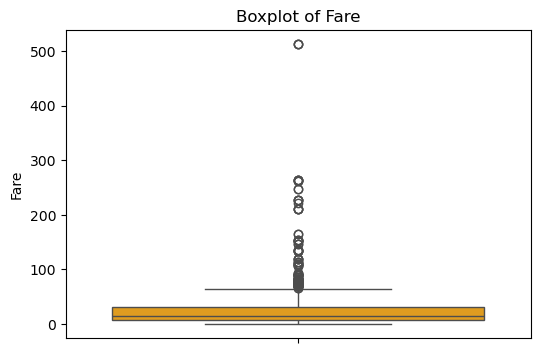

In [22]:
plt.figure(figsize=(6, 4))
sns.boxplot(y=data_cleaned['Fare'], color='orange')
plt.title("Boxplot of Fare")
plt.ylabel("Fare")
plt.show()


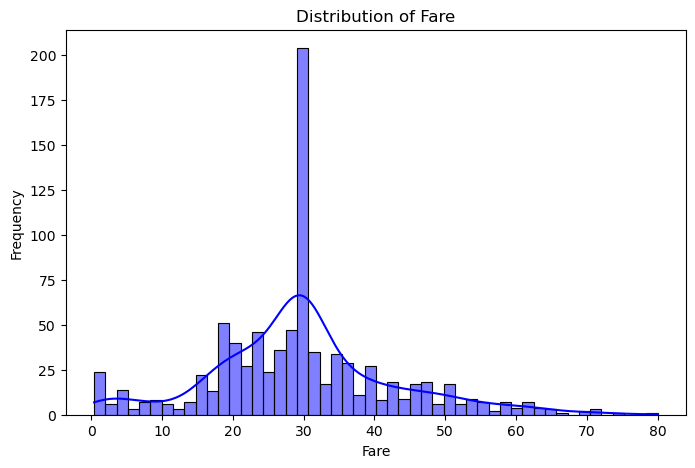

In [23]:

plt.figure(figsize=(8, 5))
sns.histplot(data_cleaned['Age'], bins=50, kde=True, color='blue')
plt.title("Distribution of Fare")
plt.xlabel("Fare")
plt.ylabel("Frequency")
plt.show()


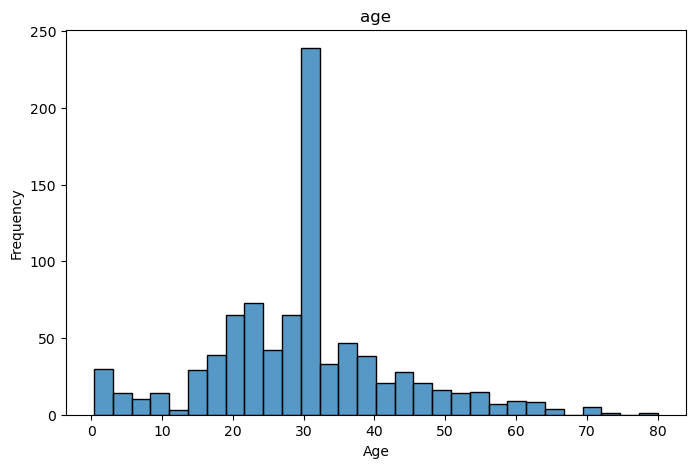

In [24]:

plt.figure(figsize=(8,5))
sns.histplot(data_cleaned['Age'],bins=30)
plt.title('age')
plt.ylabel('Frequency')
plt.xlabel('Age')
plt.show()

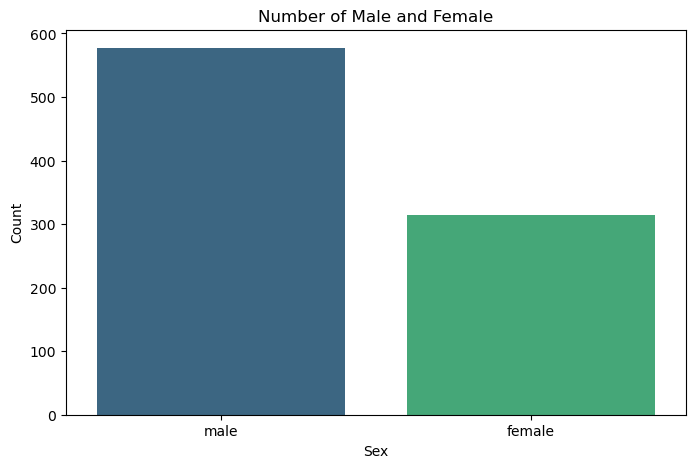

In [25]:
plt.figure(figsize=(8, 5)) 
sns.countplot(x='Sex', data=data_cleaned,hue='Sex',palette='viridis')
plt.title("Number of Male and Female")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.show()